In [ ]:
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
from torchvision import datasets, transforms, models
torch.manual_seed(0)

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import os

from models import train_loop, get_dataloaders, accuracy, get_classification_report, get_dataset

In [ ]:
!unzip brand_data.zip

# Initial Model

In [ ]:
# set data path and get dataloaders
data_path = os.path.join('/content','brand_data')
train_loader, test_loader = get_dataloaders(path=data_path,batch_size=32)

In [ ]:
# class number to string number dict
train_dataset, _ = get_dataset('brand_data')
idx_to_class = {idx:cl for cl, idx in train_dataset.class_to_idx.items()}

In [ ]:
# define model, freeze CNN portions
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# vgg16 batchsize 32, lr 0.001 epochs 20 ACCURACY 0.90
# n_features = model.classifier[0].in_features
# model.classifier = nn.Sequential(
#     nn.Linear(n_features, int(n_features/8)),
#     nn.BatchNorm1d(int(n_features/8)),
#     nn.ReLU(),
#     nn.Dropout(0.4),
#     nn.Linear(int(n_features/8), int(n_features/64)),
#     nn.BatchNorm1d(int(n_features/64)),
#     nn.ReLU(),
#     nn.Dropout(0.4),
#     nn.Linear(int(n_features/64), 4)
#     )

In [ ]:
# mobilenet_v2 batchsize 16, lr 0.001 epochs 30 ACCURACY 0.85
# n_features = model.classifier[1].in_features
# model.classifier = nn.Sequential(
#     nn.Dropout(0.3),
#     nn.Linear(n_features, int(1280/4)),
#     nn.BatchNorm1d(int(1280/4)),
#     nn.ReLU(),
#     nn.Dropout(0.3),
#     nn.Linear(int(1280/4), 4)
#     )

In [ ]:
# shufflenet_v2_x1_0 batchsize 32, lr 0.001 epochs 40 ACCURACY 0.87
# n_features = model.fc.in_features
# model.fc = nn.Sequential(
#     nn.Dropout(0.3),
#     nn.Linear(n_features, int(n_features/4)),
#     nn.BatchNorm1d(int(n_features/4)),
#     nn.ReLU(),
#     nn.Dropout(0.3),
#     nn.Linear(int(n_features/4), 4)
#     )

In [54]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [56]:
train_losses, test_losses = train_loop(model, 
                    criterion, 
                    optimizer, 
                    train_loader, 
                    test_loader, 
                    epochs=40,
                    device=device,
                    save_model=True)

Epoch 1/30, Train Loss:0.7219,                 Test Loss: 0.5122
saving new best model with Test Loss: 0.5122
Epoch 2/30, Train Loss:0.4004,                 Test Loss: 0.5903
Epoch 3/30, Train Loss:0.2976,                 Test Loss: 0.2863
saving new best model with Test Loss: 0.2863
Epoch 4/30, Train Loss:0.2728,                 Test Loss: 0.3941
Epoch 5/30, Train Loss:0.2456,                 Test Loss: 0.4016
Epoch 6/30, Train Loss:0.2434,                 Test Loss: 0.3697
Epoch 7/30, Train Loss:0.2096,                 Test Loss: 0.3095
Epoch 8/30, Train Loss:0.1747,                 Test Loss: 0.2922
Epoch 9/30, Train Loss:0.1762,                 Test Loss: 0.2620
saving new best model with Test Loss: 0.2620
Epoch 10/30, Train Loss:0.1692,                 Test Loss: 0.3373
Epoch 11/30, Train Loss:0.1387,                 Test Loss: 0.3442
Epoch 12/30, Train Loss:0.1416,                 Test Loss: 0.3132
Epoch 13/30, Train Loss:0.1297,                 Test Loss: 0.3112
Epoch 14/30, Tra

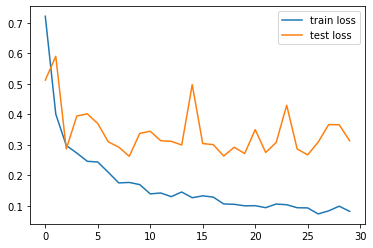

In [57]:
 # Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
model = torch.load(f'/content/models/{model.__class__.__name__}.pt')

In [59]:
# train_acc = accuracy(train_loader,model,device)
# test_acc = accuracy(test_loader,model,device)
# print(f"Accuracies for {model.__class__.__name__}")
# print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Accuracies for VGG
Train acc: 0.9546, Test acc: 0.9034


In [60]:
# print(f'Classification Report for {model.__class__.__name__}')
# print(get_classification_report(test_loader,model,device))

Classification Report for VGG
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        47
           1       0.98      0.97      0.98       132
           2       0.84      0.90      0.87        90
           3       0.71      0.71      0.71        21

    accuracy                           0.90       290
   macro avg       0.86      0.85      0.85       290
weighted avg       0.90      0.90      0.90       290



In [45]:
# train_acc = accuracy(train_loader,model,device)
# test_acc = accuracy(test_loader,model,device)
# print(f"Accuracies for {model.__class__.__name__}")
# print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Accuracies for MobileNetV2
Train acc: 0.9188, Test acc: 0.8517


In [46]:
# print(f'Classification Report for {model.__class__.__name__}')
# print(get_classification_report(test_loader,model,device))

Classification Report for MobileNetV2
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        47
           1       0.94      0.90      0.92       132
           2       0.83      0.80      0.81        90
           3       0.70      0.76      0.73        21

    accuracy                           0.85       290
   macro avg       0.80      0.83      0.81       290
weighted avg       0.86      0.85      0.85       290



In [13]:
# train_acc = accuracy(train_loader,model,device)
# test_acc = accuracy(test_loader,model,device)
# print(f"Accuracies for {model.__class__.__name__}")
# print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Accuracies for ShuffleNetV2
Train acc: 0.9775, Test acc: 0.8793


In [11]:
# print(f'Classification Report for {model.__class__.__name__}')
# print(get_classification_report(test_loader,model,device))

Classification Report for ShuffleNetV2
              precision    recall  f1-score   support

           0       0.80      0.87      0.84        47
           1       0.96      0.93      0.95       132
           2       0.81      0.88      0.84        90
           3       0.92      0.57      0.71        21

    accuracy                           0.88       290
   macro avg       0.87      0.81      0.83       290
weighted avg       0.88      0.88      0.88       290



In [ ]:
test_img = Image.open('ben_jerry_dunks.jpg')

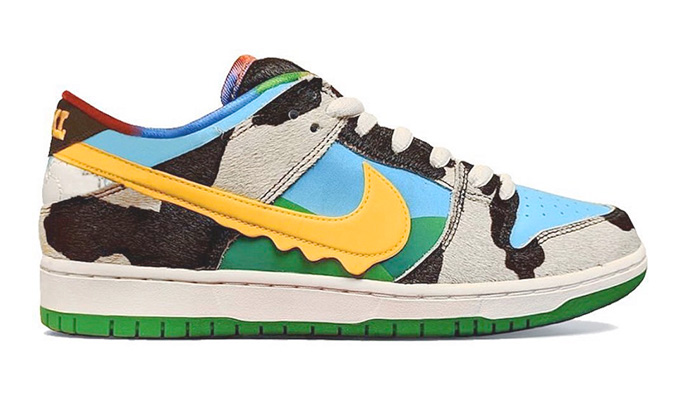

In [63]:
test_img

In [ ]:
# transformations for new test image
test_transform = transforms.Compose([
    transforms.Resize(140),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])
test_tensor = test_transform(test_img).to(device)

In [103]:
# predict for image not in dataset
test_output = model(test_tensor.reshape(1,test_tensor.size(0),test_tensor.size(1),test_tensor.size(2)))
_, prediction = torch.max(test_output, 1)

print(f'The model predicts this is a {idx_to_class[prediction.item()].title()} shoe')

The model predicts this is a Nike shoe


In [104]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/.ipynb_checkpoints/ (stored 0%)
  adding: content/models/VGG.pt (deflated 7%)
  adding: content/models/MobileNetV2.pt (deflated 8%)
  adding: content/models/ShuffleNetV2.pt (deflated 8%)


# Hyperparameter Tuning

In [ ]:
!pip install optuna

In [ ]:
!unzip brand_data.zip

this part of the notebook has parts taken from 
https://optuna.readthedocs.io/en/stable/tutorial/index.html

In [ ]:
import tensorflow as tf
try:
    tf.get_logger().setLevel('INFO')
except Exception as exc:
    print(exc)
from glob import glob
import re
import warnings
warnings.simplefilter("ignore")

import os
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms, models

from models import (train_loop, 
                    get_dataloaders, 
                    accuracy, 
                    get_dataset
                    define_model,
                    objective,
                    optimized_model,
                    optimized_loop)

%matplotlib inline
import matplotlib.style as style
import matplotlib.pyplot as plt

import optuna
style.use("ggplot")

In [ ]:
# get data loaders and target brands
train_data, _ = get_dataset('brand_data')
brands = train_data.classes

In [ ]:
# set hyperparameters/paths
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
BATCHSIZE = 32
CLASSES = 4
DIR = os.getcwd()
EPOCHS = 20
LOG_INTERVAL = 1
N_TRAIN_EXAMPLES = sum(len(glob(os.path.join('/content','brand_data','train',brand,'**'))) for brand in brands)
N_TEST_EXAMPLES = sum(len(glob(os.path.join('/content','brand_data','test',brand,'**'))) for brand in brands)

In [8]:
# run trials for hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

pruned_trials = [t for t in study.trials if t.state == optuna.structs.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.structs.TrialState.COMPLETE]

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2020-05-28 19:03:45,697] Finished trial#0 with value: 0.6862068965517242 with parameters: {'n_layers': 2, 'n_units_l0': 11460, 'dropout_l0': 0.34388650192825543, 'n_units_l1': 4298, 'dropout_l1': 0.49940287488903384, 'optimizer': 'RMSprop', 'lr': 0.013649523267920283}. Best is trial#0 with value: 0.6862068965517242.
[I 2020-05-28 19:13:50,204] Finished trial#1 with value: 0.7034482758620689 with parameters: {'n_layers': 2, 'n_units_l0': 4715, 'dropout_l0': 0.43753443310123974, 'n_units_l1': 10285, 'dropout_l1': 0.45053434953231003, 'optimizer': 'SGD', 'lr': 0.0002052296476393493}. Best is trial#1 with value: 0.7034482758620689.
[I 2020-05-28 19:24:23,936] Finished trial#2 with value: 0.5862068965517241 with parameters: {'n_layers': 1, 'n_units_l0': 9521, 'dropout_l0': 0.3160731298460415, 'optimizer': 'SGD', 'lr': 1.2631774927540644e-05}. Best is trial#1 with value: 0.7034482758620689.
[I 2020-05-28 19:38:15,875] Finished trial#3 with value: 0.8931034482758621 with parameters: {'n_la

Study statistics: 
  Number of finished trials:  100
  Number of pruned trials:  67
  Number of complete trials:  33
Best trial:
  Value:  0.9275862068965517
  Params: 
    n_layers: 2
    n_units_l0: 7933
    dropout_l0: 0.21148857210893734
    n_units_l1: 12020
    dropout_l1: 0.46695470143984114
    optimizer: RMSprop
    lr: 1.0455375032668124e-05


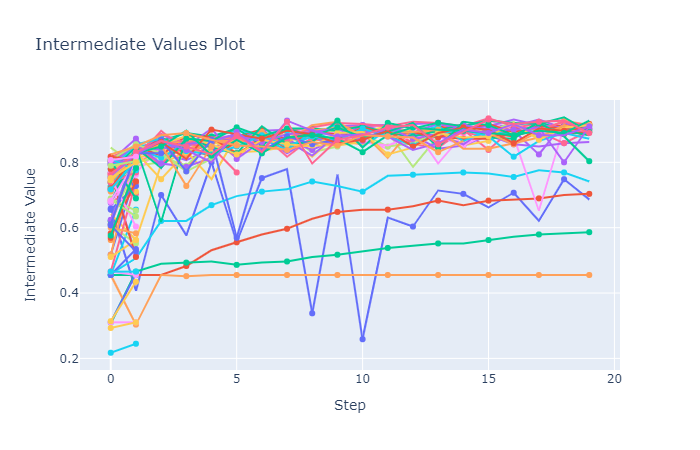

In [10]:
optuna.visualization.plot_intermediate_values(study)

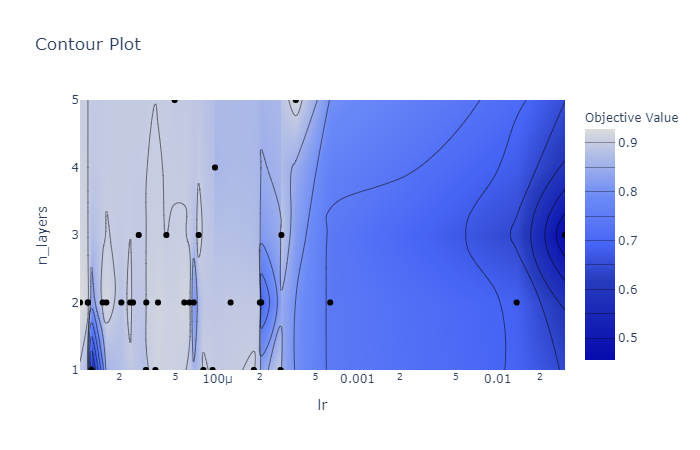

In [11]:
optuna.visualization.plot_contour(study, params=['n_layers', 'lr'])

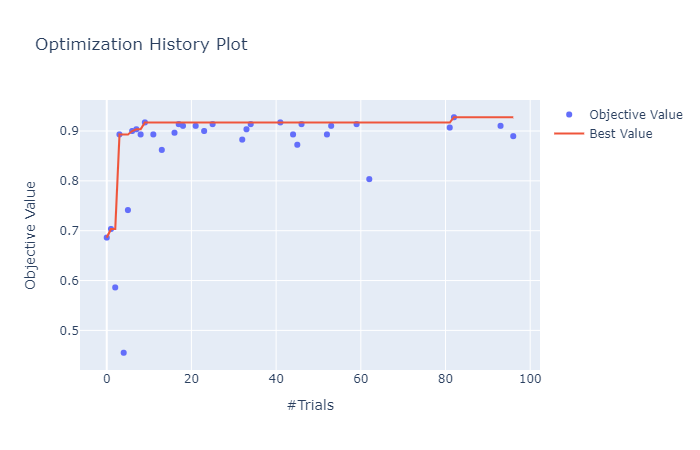

In [12]:
optuna.visualization.plot_optimization_history(study)

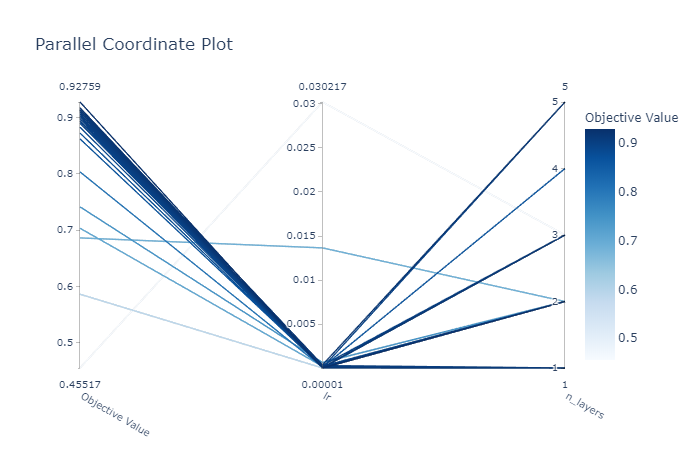

In [13]:
optuna.visualization.plot_parallel_coordinate(study, params=['n_layers', 'lr'])

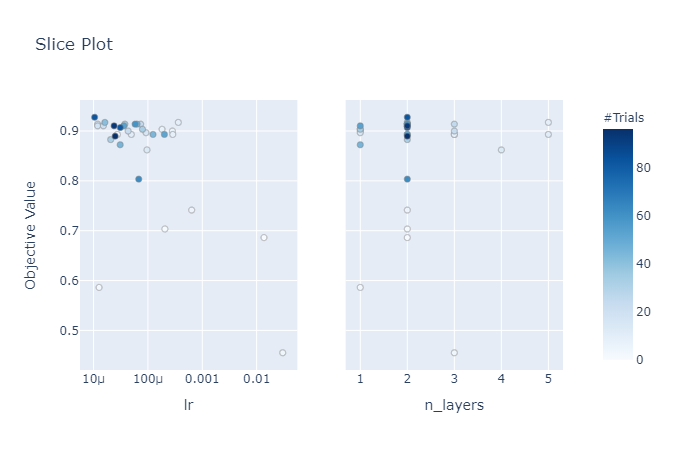

In [14]:
optuna.visualization.plot_slice(study, params=['n_layers', 'lr'])

### Deployment

In [43]:
study.best_trial.params

{'dropout_l0': 0.21148857210893734,
 'dropout_l1': 0.46695470143984114,
 'lr': 1.0455375032668124e-05,
 'n_layers': 2,
 'n_units_l0': 7933,
 'n_units_l1': 12020,
 'optimizer': 'RMSprop'}

In [ ]:
# save optimized parameters
optimized_params = study.best_trial.params

In [15]:
# run new model with optimized params
vgg_optimized = optimized_model(optimized_params).to(DEVICE)
optimized_optimizer = optim.RMSprop(vgg_optimized.parameters(), lr=optimized_params['lr'])

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [16]:
print(vgg_optimized)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
# run test
test_accuracies = optimized_loop(vgg_optimized,optimized_optimizer)

Epoch 0/20, Testing Accuracy is: 0.8241379310344827
Epoch 1/20, Testing Accuracy is: 0.8172413793103448
Epoch 2/20, Testing Accuracy is: 0.896551724137931
Epoch 3/20, Testing Accuracy is: 0.8896551724137931
Epoch 4/20, Testing Accuracy is: 0.8551724137931035
Epoch 5/20, Testing Accuracy is: 0.8758620689655172
Epoch 6/20, Testing Accuracy is: 0.8206896551724138
Epoch 7/20, Testing Accuracy is: 0.903448275862069
Epoch 8/20, Testing Accuracy is: 0.8931034482758621
Epoch 9/20, Testing Accuracy is: 0.8482758620689655
Epoch 10/20, Testing Accuracy is: 0.9137931034482759
Epoch 11/20, Testing Accuracy is: 0.7896551724137931
Epoch 12/20, Testing Accuracy is: 0.8586206896551725
Epoch 13/20, Testing Accuracy is: 0.8896551724137931
Epoch 14/20, Testing Accuracy is: 0.8379310344827586
Epoch 15/20, Testing Accuracy is: 0.8827586206896552
Epoch 16/20, Testing Accuracy is: 0.896551724137931
Epoch 17/20, Testing Accuracy is: 0.8931034482758621
Epoch 18/20, Testing Accuracy is: 0.8827586206896552
Epoch 

In [ ]:
# save model and compute accuracies
best_model = torch.load(f'/content/models/{vgg_optimized.__class__.__name__}_optimized.pt')
data_path = os.path.join('/content','brand_data')
train_loader, test_loader = get_dataloaders(path=data_path,batch_size=BATCHSIZE)
train_acc = accuracy(train_loader,best_model,DEVICE)
test_acc = accuracy(test_loader,best_model,DEVICE)

In [23]:
print(f'Classification Report for {vgg_optimized.__class__.__name__}_optimized')
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")
print(get_classification_report(test_loader,best_model,DEVICE))

Classification Report for VGG_optimized
Train acc: 0.9657, Test acc: 0.9138
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.93      0.98      0.96       132
           2       0.92      0.84      0.88        90
           3       0.85      0.81      0.83        21

    accuracy                           0.91       290
   macro avg       0.90      0.88      0.89       290
weighted avg       0.91      0.91      0.91       290

